<a href="https://colab.research.google.com/github/mebirtukan/Oeson-data-science-Internship-and-Training/blob/main/Statistical_Analysis_and_Visualization_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title #Task 1: Data Generation

import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(0)

# Generate data
n_samples = 1000
age = np.random.normal(35, 10, n_samples)
height = np.random.normal(170, 15, n_samples)
weight = np.random.normal(70, 10, n_samples)
gender = np.random.choice(['Male', 'Female'], n_samples)
income = np.random.normal(50000, 15000, n_samples)

# Create DataFrame
data = pd.DataFrame({
    'Age': age,
    'Height': height,
    'Weight': weight,
    'Gender': gender,
    'Income': income
})

# Display the first few rows of the dataset
data.head()


,Age,Height,Weight,Gender,Income
0,52.640523,178.339440,54.670789,Female,64183.081842
1,39.001572,183.387108,52.880298,Female,46979.231851
2,44.787380,163.665278,70.461351,Female,72657.870980
3,57.408932,171.570710,60.416255,Female,41427.823774
4,53.675580,173.420800,69.191884,Male,59983.839304


In [ ]:
# @title #Task 2: Descriptive Statistics

# Calculate mean, median, standard deviation, and variance for each numerical column
mean_values = data[['Age', 'Height', 'Weight', 'Income']].mean()
median_values = data[['Age', 'Height', 'Weight', 'Income']].median()
std_dev_values = data[['Age', 'Height', 'Weight', 'Income']].std()
variance_values = data[['Age', 'Height', 'Weight', 'Income']].var()

# Combine all statistics into a single DataFrame for easier viewing
summary_stats = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Standard Deviation': std_dev_values,
    'Variance': variance_values
})

# Display the combined summary statistics
print(summary_stats)

# Calculate the mode for the 'Gender' column
mode_gender = data['Gender'].mode()[0]

# Display the mode for the 'Gender' column
print(f"The mode for the 'Gender' column is: {mode_gender}")

                Mean        Median  Standard Deviation      Variance
Age        34.547433     34.419720            9.875270  9.752097e+01
Height    170.204254    170.390930           14.529666  2.111112e+02
Weight     69.487714     69.475022            9.545943  9.112502e+01
Income  50062.149141  49950.947567        15174.937804  2.302787e+08
The mode for the 'Gender' column is: Female


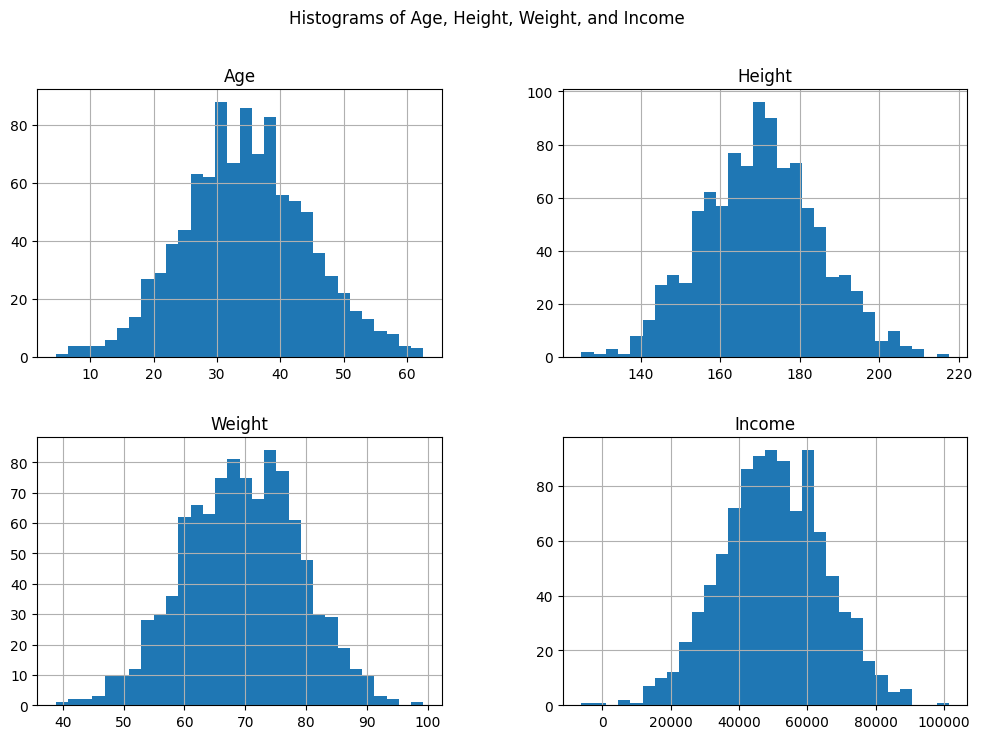

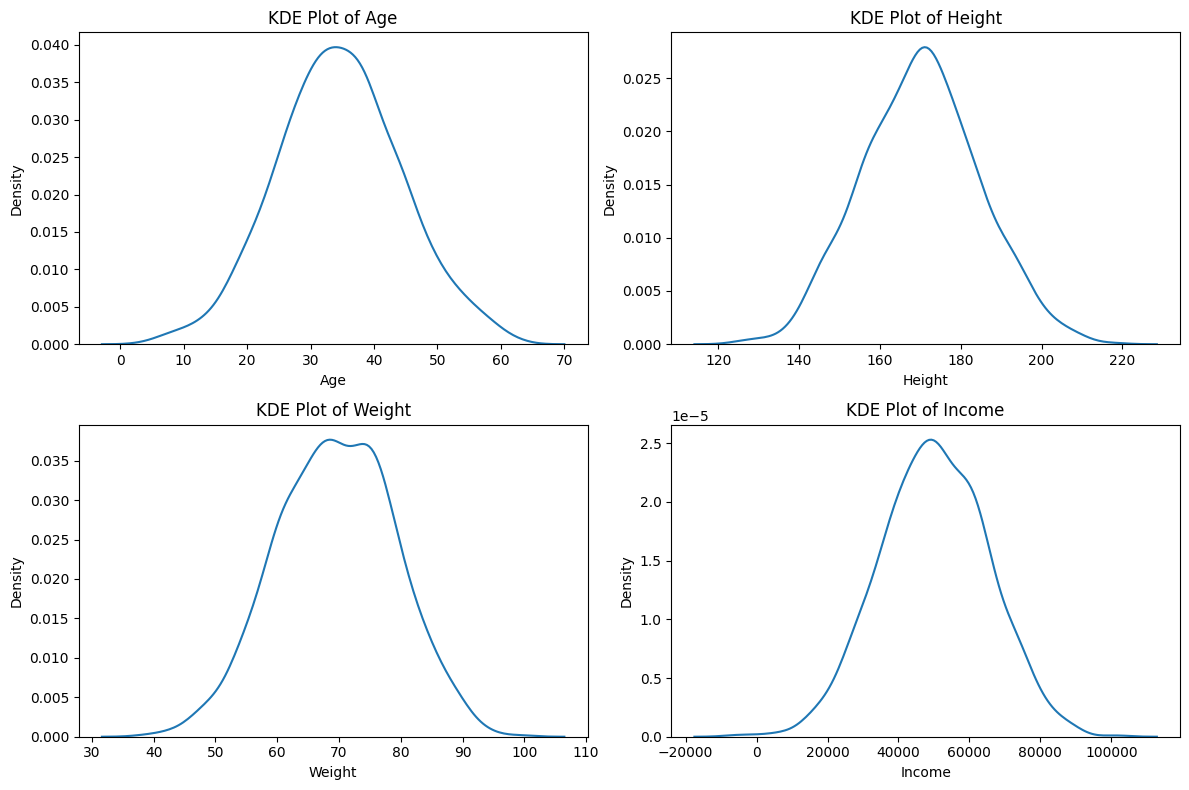

In [ ]:
# @title #Task 3: Data Visualization


import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
data.hist(bins=30, figsize=(12, 8))
plt.suptitle('Histograms of Age, Height, Weight, and Income')
plt.show()

# KDE plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.kdeplot(data['Age'], ax=axes[0, 0])
axes[0, 0].set_title('KDE Plot of Age')
sns.kdeplot(data['Height'], ax=axes[0, 1])
axes[0, 1].set_title('KDE Plot of Height')
sns.kdeplot(data['Weight'], ax=axes[1, 0])
axes[1, 0].set_title('KDE Plot of Weight')
sns.kdeplot(data['Income'], ax=axes[1, 1])
axes[1, 1].set_title('KDE Plot of Income')
plt.tight_layout()
plt.show()




Outliers in Age:
            Age      Height     Weight  Gender        Income
271   7.274072  191.080482  69.157767    Male  42394.100658
334   8.408278  160.810614  72.462228    Male  54833.076245
427   7.603228  184.678509  77.920415    Male  27991.260010
494  61.962241  137.628972  66.972540  Female  60871.237255
589   4.538569  178.371228  89.595620  Female  77655.499647
685   6.654455  168.715776  77.312936  Female  48514.329475
898  60.944246  174.480705  65.707761  Female  37484.759480
943  62.593551  164.636315  78.366360    Male  54012.257946
Outliers in Height:
            Age      Height     Weight  Gender        Income
54   34.718178  217.564622  70.864525    Male  66863.326017
256  27.744026  128.339613  66.787411  Female  29852.111854
351  20.622085  209.644036  59.216389    Male  51571.325664
418  50.199949  127.966958  79.385851    Male  41241.817777
446  39.574156  125.080807  78.927082    Male  36222.213853
488  34.542960  210.208563  79.367952    Male  39132.723878
8

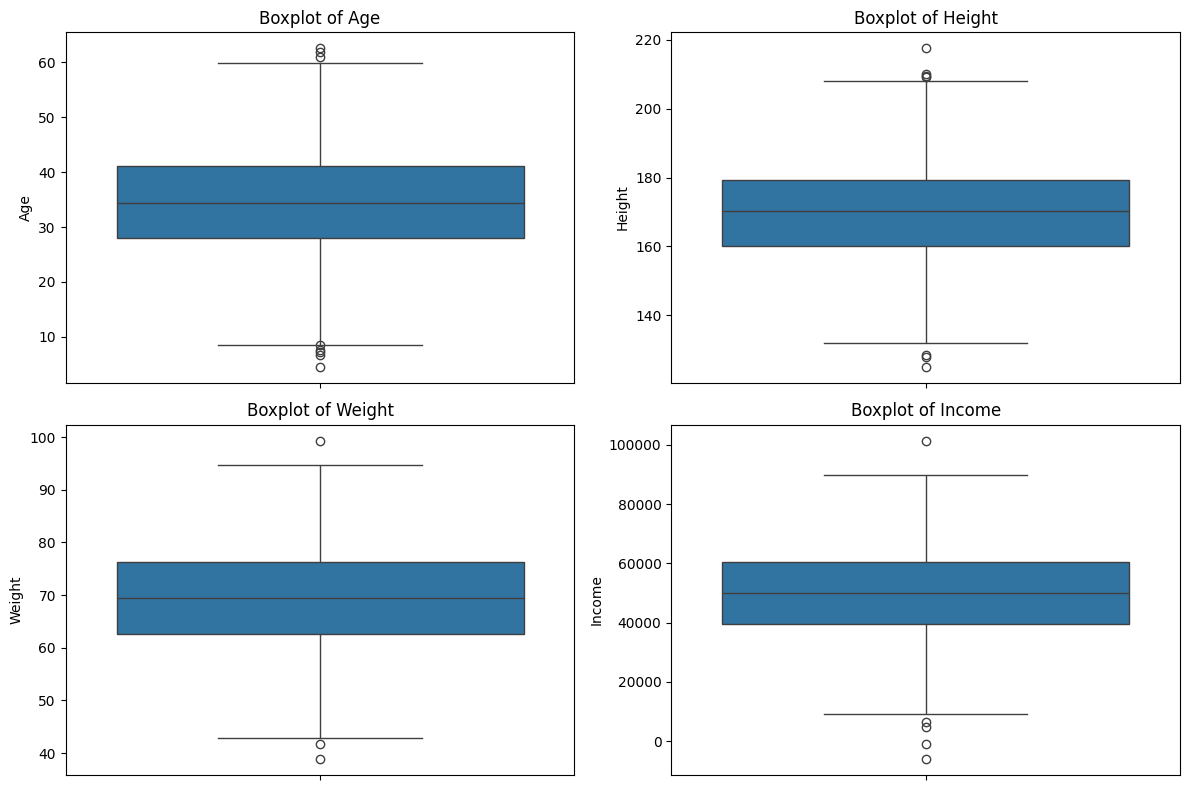

In [ ]:
# @title #Detect Outliers in each column and Plot
# Function to detect outliers using IQR method
def detect_outliers(column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Detect outliers for Age, Height, Weight, and Income
outliers_age = detect_outliers('Age')
outliers_height = detect_outliers('Height')
outliers_weight = detect_outliers('Weight')
outliers_income = detect_outliers('Income')

print("Outliers in Age:\n", outliers_age)
print("Outliers in Height:\n", outliers_height)
print("Outliers in Weight:\n", outliers_weight)
print("Outliers in Income:\n", outliers_income)

# Boxplots to visualize distribution including outliers
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.boxplot(y=data['Age'], ax=axes[0, 0])
axes[0, 0].set_title('Boxplot of Age')

sns.boxplot(y=data['Height'], ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of Height')

sns.boxplot(y=data['Weight'], ax=axes[1, 0])
axes[1, 0].set_title('Boxplot of Weight')

sns.boxplot(y=data['Income'], ax=axes[1, 1])
axes[1, 1].set_title('Boxplot of Income')

plt.tight_layout()
plt.show()


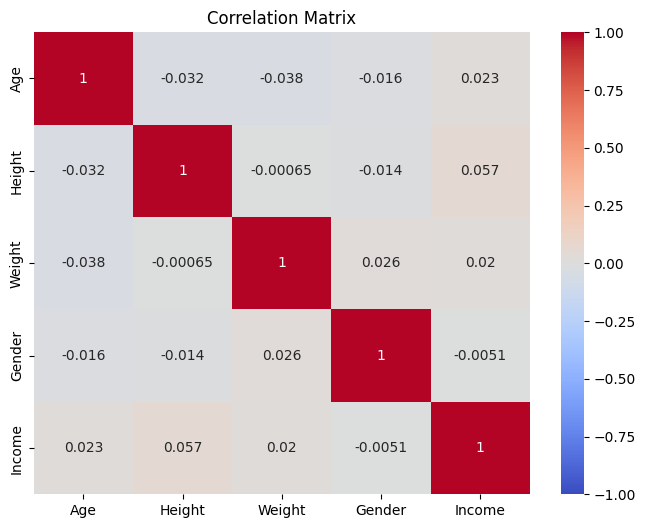

In [ ]:
# @title #Task 4: Correlation Analysis First, we need to convert the 'Gender' column to numerical values.
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# Correlation matrix
correlation_matrix = data.corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# @title #Task 5: Inferential Statistics

from scipy.stats import ttest_ind

# Separate the income data by gender
income_male = data[data['Gender'] == 0]['Income']
income_female = data[data['Gender'] == 1]['Income']

# Perform t-test
t_stat, p_value = ttest_ind(income_male, income_female)

t_stat, p_value


(0.16093082856726248, 0.8721804507928543)